In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import itertools

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load 
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_trial_merge = pd.merge(clinical_trial_df, mouse_drug_df, on="Mouse ID")

# Display the data table for preview
clinical_trial_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [2]:
# Reduce dataset to observations on the 4 drug_names items only
drug_names = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

## code snippet to keep ##
clinical_trial_merge_subset = clinical_trial_merge.loc[clinical_trial_merge['Drug'].isin(drug_names)]


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_clinical_trial = clinical_trial_merge_subset.groupby(["Drug", "Timepoint"])

avg_tumor_vol = grouped_clinical_trial["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_vol_df = pd.DataFrame({"Tumor Volume (mm3)": avg_tumor_vol}).reset_index()

# Preview DataFrame
tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grouped_tumor_trial = grouped_clinical_trial["Tumor Volume (mm3)"]
tumor_sem = grouped_tumor_trial.sem() 

drug_list = grouped_clinical_trial["Drug"].first()  
timepoint_list = grouped_clinical_trial["Timepoint"].first()

# Convert to DataFrame
tumor_sem_df = pd.DataFrame({"Drug_":drug_list, "Timepoint_": timepoint_list, "Tumor Volume SEM": tumor_sem.values}).reset_index(drop = True)

# Preview DataFrame
tumor_sem_df.head()


,Drug_,Timepoint_,Tumor Volume SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
drug_tumor_table = pd.pivot_table(tumor_vol_df, values='Tumor Volume (mm3)', index='Timepoint', columns=['Drug'])

# Preview that Reformatting worked
drug_tumor_table

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


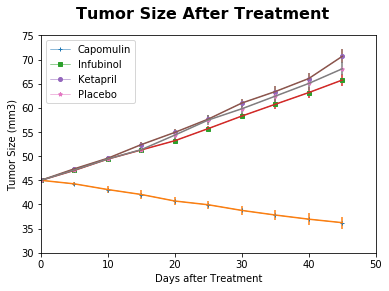

In [6]:
# Generate the Plot (with Error Bars)

x_values = drug_tumor_table.index.tolist()

marker = itertools.cycle(('+', 's', 'o', '*'))

fig, ax = plt.subplots()

fig.suptitle("Tumor Size After Treatment", fontsize=16, fontweight="bold")
ax.set_xlim(0, 50)
ax.set_ylim(30, 75)
ax.set_xlabel("Days after Treatment")
ax.set_ylabel("Tumor Size (mm3)")

legend_list = []

for drug_name in drug_names:

    tumor_values = drug_tumor_table[drug_name].apply(lambda x : pd.to_numeric(x))

    error = tumor_sem_df.groupby(["Drug_"]).get_group(drug_name)["Tumor Volume SEM"].tolist()
    
    ax.plot(x_values, tumor_values, linewidth=0.5, marker=next(marker), markersize=4)
    ax.errorbar(x_values, tumor_values, yerr = error)
    legend_list.append(drug_name)
    ax.legend(legend_list, loc = "upper left")
           
# Save the Figure
plt.savefig("../images/tumor_size.png")

# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
avg_met_site = grouped_clinical_trial["Metastatic Sites"].mean()

# Convert to DataFrame
met_site_df = pd.DataFrame({"Metastatic Sites": avg_met_site}).reset_index()

# Preview DataFrame
met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
grouped_met_trial = grouped_clinical_trial["Metastatic Sites"]

met_sem = grouped_met_trial.sem() 

# Convert to DataFrame
met_sem_df = pd.DataFrame({"Drug_":drug_list, "Timepoint_": timepoint_list, "Metastatic Sites SEM": met_sem.values}).reset_index(drop = True)

# Preview DataFrame
met_sem_df.head()

,Drug_,Timepoint_,Metastatic Sites SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
drug_met_table = pd.pivot_table(met_site_df, values='Metastatic Sites', index='Timepoint', columns=['Drug'])

# Preview that Reformatting worked
drug_met_table

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


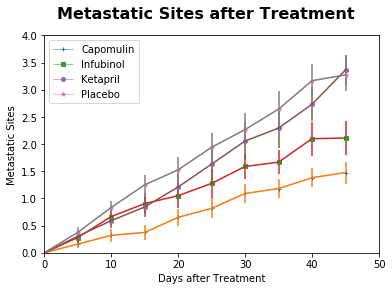

In [10]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

fig.suptitle("Metastatic Sites after Treatment", fontsize=16, fontweight="bold")

ax.set_xlim(0, 50)
ax.set_ylim(0, 4)
ax.set_xlabel("Days after Treatment")
ax.set_ylabel("Metastatic Sites")

for drug_name in drug_names:

    met_values = drug_met_table[drug_name].apply(lambda x : pd.to_numeric(x))

    error = met_sem_df.groupby(["Drug_"]).get_group(drug_name)["Metastatic Sites SEM"].tolist()
    
    ax.plot(x_values, met_values, linewidth=0.5, marker=next(marker), markersize=4)
    ax.errorbar(x_values, met_values, yerr = error) #----same x_values as previous plot
    ax.legend(legend_list, loc = "upper left") #----same legend_list as previous plot
           
# Save the Figure
plt.savefig("../images/metastatic.png")        
        
# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = grouped_clinical_trial["Mouse ID"].count()

# Convert to DataFrame
mouse_rate_df = pd.DataFrame({"Number of Mice": mouse_count}).reset_index()

# Preview DataFrame
mouse_rate_df.head()

,Drug,Timepoint,Number of Mice
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_table = pd.pivot_table(mouse_rate_df, values='Number of Mice', index='Timepoint', columns=['Drug'])

# Preview that Reformatting worked
mouse_count_table

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


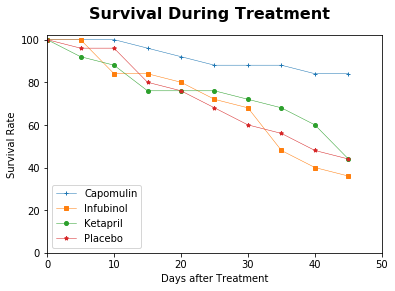

In [13]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()

fig.suptitle("Survival During Treatment", fontsize=16, fontweight="bold")
ax.set_xlim(0, 50)
ax.set_ylim(0, 102)
ax.set_xlabel("Days after Treatment")
ax.set_ylabel("Survival Rate")


for drug_name in drug_names:
    
    initial_value = mouse_count_table[drug_name][0]
    percent_values = mouse_count_table[drug_name].apply(lambda x : pd.to_numeric(x))
    percent_values = (percent_values / initial_value)*100
    
    ax.plot(x_values, percent_values, linewidth=0.5, marker=next(marker), markersize=4)
    ax.legend(legend_list, loc = "lower left")
  
# Save the Figure
plt.savefig("../images/survival.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
tumor_change = []

for name in drug_names:
    percent_change = ((drug_tumor_table[name].iloc[-1] - drug_tumor_table[name].iloc[0])/drug_tumor_table[name].iloc[0])*100
    tumor_change.append(percent_change) 

# Display the data to confirm
tumor_change_df = pd.DataFrame({"Drug":drug_names, "Tumor Growth":tumor_change})

tumor_change_df

,Drug,Tumor Growth
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


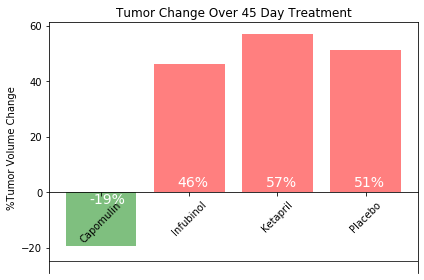

In [22]:
# Splice the data between passing and failing drugs


# Store all Relevant Percent Changes into a Tuple
tumor_change_df.apply(tuple, axis=1)

x_axis = drug_names
y_values = tumor_change_df["Tumor Growth"]

color_list = []

for name in tumor_change:
    if name >= 0:
        color_list.append('r')
    else:
        color_list.append('g')
        
# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()        
        
ax.bar(x_axis, y_values, color=color_list, alpha=0.5, align="center")
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("%Tumor Volume Change")
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.axhline(y=-25, color='k', linewidth=0.75)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
fig.tight_layout()

#Add percent label inside bar graph, using patch placement
for i in ax.patches:
    if i.get_height() >= 0:
        ax.text(i.get_x()+0.33*i.get_width(), 2, str(int(round(i.get_height())))+'%', fontsize=14, color='white')
    else:
        ax.text(i.get_x()+0.33*i.get_width(), -4, str(int(round(i.get_height())))+'%', fontsize=14, color='white')

# Save the Figure
plt.savefig("../images/tumor_change.png")

# Show the Figure
fig.show()

Analysis:  3 Observations

From the trials of 250 mice, we focused on a subset of the group of mice administerred one of four treatments (Capomulin, Infubinol, Ketapril, and Placebo). Over the course of 45 days, the following trends are observed:

Capomulin was the only treatment to reduce Tumor Volume over the 45 day course. The mice taking Infubinol and Ketapril had percent increases to Tumor Volume similar to the Placebo group.

Capomulin mice also had a much higher rate of survival than the other three groups (nearly 30 points higher).

All groups experienced an increase in number of Metastatic Sites, to varying degrees.

Overall, of the four treatments analyzed(Capomulin, Infubinol, Ketapril, and Placebo), Capomulin is the only drug to produce positive results.